In [1]:
import math
import datetime
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.compose import make_column_selector as selector
import warnings
import sys
sys.path.append('C:/Users/VickyChoudhary/OneDrive - Zenon/106. Zennovate - 2022/Final')
from ezy_functions import *
label_encoder = preprocessing.LabelEncoder()


In [23]:
# Paths for Data files
customer_data_path = "C:/Users/VickyChoudhary/Downloads/customer_info_v2.csv"
transaction_data_path = "C:/Users/VickyChoudhary/Downloads/transaction_data_v2.csv"
mapping_data_path = "C:/Users/VickyChoudhary/Downloads/test_control_mapping.csv"

# Campaign Dates
campaign_start_date = "2021-10-01"
campaign_end_date = "2021-12-31"
pre_campaign_date = "2021-09-30"
pre_start_date = "2021-01-01"

In [3]:
master_data, customer_data = master_data(
    transaction_data_path, customer_data_path, mapping_data_path, "Customer_ID"
)
master_data = data_manipulation(master_data, "Spend_Amount")
master_data = outlier_removal_function(
    master_data, "Spend_Amount", "Cutoff Method", upper_limit=450, lower_limit=50
)
master_data = data_filter_dict(master_data, filt_dict=None)
campaign_data, pre_campaign_data = data_filtration(
    master_data, campaign_start_date, campaign_end_date, pre_campaign_date
)
campaign_grouped = data_grouping(campaign_data,customer_data, ['Customer_ID','flag'],'Customer_ID', ['Spend_Amount'])
pre_campaign_grouped = data_grouping(pre_campaign_data,customer_data, ['Customer_ID','flag'],'Customer_ID', ['Spend_Amount'])

#print(campaign_data.describe(), end="\n")
#print(pre_campaign_data.describe(), end="\n")

No filtraion criteria passed


In [4]:
#Control Matching
var_list = ["Spend_Amount", "Age", "Job","Marital_Status", 'Education']
final_data_test, final_data_control =control_matching('KNN', pre_campaign_grouped,campaign_grouped, pre_campaign_data,campaign_data, 'flag',var_list, 'Customer_ID')


C:\Users\VickyChoudhary\OneDrive - Zenon\106. Zennovate - 2022\Final\ezy_functions.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control["indice_c"] = df_control.index


In [5]:
print(final_data_test.Spend_Amount.mean())
print(final_data_control.Spend_Amount.mean())


204.96734850867216
214.75263985801465


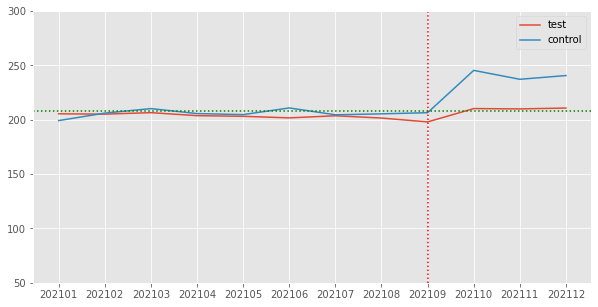

In [6]:
#Pre Campaign monthly averages

plt = plot_charts_avg(final_data_test,final_data_control,'Yearmonth', 'Spend_Amount')

plt.axvline(x = '202109', color = 'r', linestyle = 'dotted')
plt.axhline(y = 208.45 , color = 'g', linestyle = 'dotted')

plt.ylim([50,300])
plt.show()
#Pre Campaign monthly averages
# plt = plot_charts_avg(during_trans_test,during_trans_control,'Yearmonth', 'Spend_Amount')
# plt.show()

#campaign period - Oct'21 - Dec'21

In [60]:
def lift_cal1(test_data, control_data,pre_start_date, pre_end_date,campaign_start_date, campaign_end_date, metric):
    test_data.Date = pd.to_datetime(test_data.Date)
    control_data.Date = pd.to_datetime(control_data.Date)
    test_pre = test_data[(test_data['Date']<=pre_end_date)]
    test_dur = test_data[(test_data['Date']>=campaign_start_date)]
    control_pre = control_data[(control_data['Date'] <= pre_end_date)]
    control_dur = control_data[(control_data['Date'] >= campaign_start_date)]
    
    t_pre = test_pre[metric].mean()
    t_dur = test_dur[metric].mean()
    c_pre = control_pre[metric].mean()
    c_dur = control_dur[metric].mean()
    
    lift = (t_dur - c_dur) - (t_pre - c_pre)
    lift_perc = (t_pre - c_pre)
    return lift, lift_perc    

In [61]:
lift, lift_perc = lift_cal1(final_data_test, final_data_control, pre_start_date,pre_campaign_date,campaign_start_date,campaign_end_date,'Spend_Amount')

In [62]:
print(lift)
print(lift_perc)

# Customer level
# testing the code performance
# dimension level - lift
# lift, trend,
# another data set

-28.19184584272182
-2.6355253637274245
